## Task # 2 - To Explore Supervised Machine Learning
### predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [1]:
#libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#raed the data
data=pd.read_csv("http://bit.ly/w-data") 

In [3]:
data.head() # top 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [6]:
# describe the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# count null value
data.isna().sum()

Hours     0
Scores    0
dtype: int64

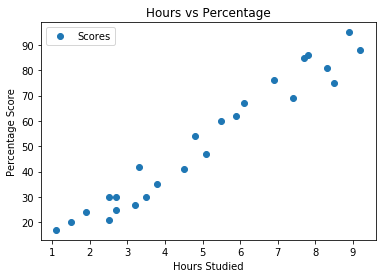

In [9]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### select dependent 'y' and Independent 'x' 

In [11]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

### Splitting the data into train set and the test set

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Implementing Linear Regression Algorithm

In [14]:
from sklearn.linear_model import LinearRegression as LR
regressor = LR()  
regressor.fit(X_train, y_train) 

print("Training completed")

Training completed


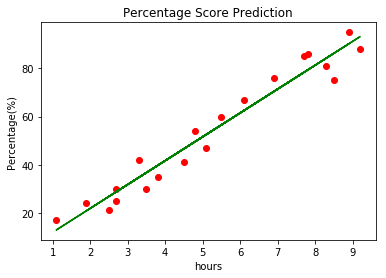

In [17]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "green")
plt.title("Percentage Score Prediction")
plt.xlabel("hours")
plt.ylabel("Percentage(%)")
plt.show()

### Making Predictions

In [19]:
# Making Predictions
y_pred = regressor.predict(X_test)

In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


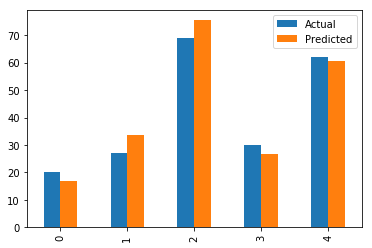

In [27]:
df.plot(kind='bar')

In [28]:
hrs = float(input())
print("Number of Hours the student studied : ", hrs)
print("Predicted Score for the student is = ", regressor.predict(np.array(hrs).reshape(1,-1))[0])

9.25
Number of Hours the student studied :  9.25
Predicted Score for the student is =  93.69173248737538


### Evaluating the model

In [30]:
## evaluate the performance of algorithm
from sklearn import metrics 

print('mean squared error:', 
      metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 


mean squared error: 21.5987693072174
Mean Absolute Error: 4.183859899002975
